# Strain-induced band offsets

In [1]:
from aftershoq.materials import *
import scipy.constants as cn
import numpy as np
from matplotlib import pyplot as pl

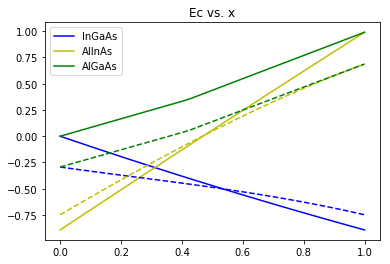

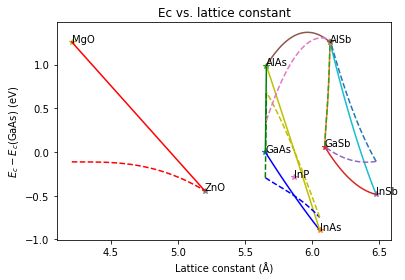

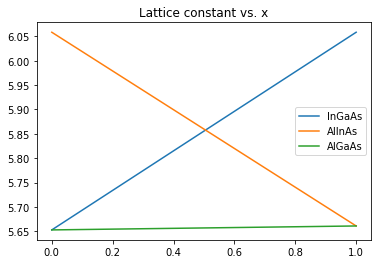

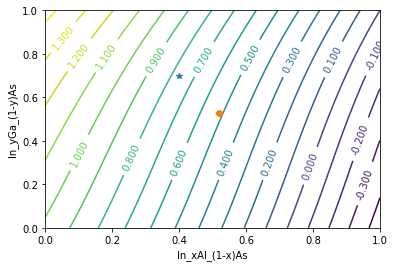

In [2]:
ingaas =InGaAs()
alinas = AlInAs()
algaas = AlGaAs(x=0.10)
alinsb = AlInSb(x=0.1)
algasb = AlGaSb(x=0.1)
gainsb = GaInSb(x=0.1)
alassb = AlAsSb(x=0.1)
gaas = GaAs()
alas = AlAs()
inas = InAs()
znmgo = ZnMgO(x = 0.)

inp = InP()

#alinas.C["Ec"] = -0.0383
#ingaas.C["Ec"] = 0.3

x = np.linspace(0,1)
y = np.linspace(0,1)

ec_ingaas = []
ec_alinas = []
ec_algaas = []
ec_inas = []
ec_znmgo = []
ec_alinsb = []
ec_algasb = []
ec_gainsb = []
ec_alassb = []

eg_ingaas = []
eg_alinas = []
eg_algaas = []

a_ingaas = []
a_alinas = []
a_algaas = []
a_inas = []
a_znmgo = []
a_alinsb = []
a_algasb = []
a_gainsb = []
a_alassb = []

ec_ingaas_s = []
ec_alinas_s = []
ec_algaas_s = []
ec_znmgo_s = []
ec_alinsb_s = []
ec_algasb_s = []
ec_gainsb_s = []
ec_alassb_s = []

eg_ingaas_s = []
eg_alinas_s = []
eg_algaas_s = []

algaas.substrate = InP()

Z = []
for xx in x:
    algaas.updateAlloy(x=xx)
    ingaas.updateAlloy(x=xx)
    alinas.updateAlloy(x=xx)
    znmgo.updateAlloy(x=xx)
    alinsb.updateAlloy(x=xx)
    algasb.updateAlloy(x=xx)
    gainsb.updateAlloy(x=xx)
    alassb.updateAlloy(x=xx)
    
    ec_algaas.append(algaas.params["Ec"])
    ec_ingaas.append(ingaas.params["Ec"])
    ec_alinas.append(alinas.params["Ec"])
    ec_inas.append(inas.params["Ec"])
    ec_znmgo.append(znmgo.params["Ec"])
    ec_alinsb.append(alinsb.params["Ec"])
    ec_algasb.append(algasb.params["Ec"])
    ec_gainsb.append(gainsb.params["Ec"])
    ec_alassb.append(alassb.params["Ec"])
    
    eg_algaas.append(algaas.params["Eg"])
    eg_ingaas.append(ingaas.params["Eg"])
    eg_alinas.append(alinas.params["Eg"])
    
    a_ingaas.append(ingaas.params["lattconst"])
    a_alinas.append(alinas.params["lattconst"])
    a_algaas.append(algaas.params["lattconst"])
    a_inas.append(inas.params["lattconst"])
    a_znmgo.append(znmgo.params["lattconst"])
    a_alinsb.append(alinsb.params["lattconst"])
    a_algasb.append(algasb.params["lattconst"])
    a_gainsb.append(gainsb.params["lattconst"])
    a_alassb.append(alassb.params["lattconst"])
    
    alinas.calcStrain()
    ingaas.calcStrain()
    algaas.calcStrain()
    znmgo.calcStrain()
    alinsb.calcStrain()
    algasb.calcStrain()
    gainsb.calcStrain()
    alassb.calcStrain()
    
    ec_algaas_s.append(algaas.params["Ec"])
    ec_ingaas_s.append(ingaas.params["Ec"])
    ec_alinas_s.append(alinas.params["Ec"])
    ec_znmgo_s.append(znmgo.params["Ec"])
    ec_alinsb_s.append(alinsb.params["Ec"])
    ec_algasb_s.append(algasb.params["Ec"])
    ec_gainsb_s.append(gainsb.params["Ec"])
    ec_alassb_s.append(alassb.params["Ec"])
    
    eg_algaas_s.append(algaas.params["Eg"])
    eg_ingaas_s.append(ingaas.params["Eg"])
    eg_alinas_s.append(alinas.params["Eg"])
    
    
    row = []
    for yy in x:
        ec1 = alinas.params["Ec"]
        ingaas.updateAlloy(x=yy)
        ingaas.calcStrain()
        ec2 = ingaas.params["Ec"]
        row.append(ec1-ec2)
    Z.append(row)
    
        
pl.plot(x, ec_ingaas,'b', x, ec_alinas,'y', x, ec_algaas,'g')
pl.plot(x, ec_ingaas_s,'b--', x, ec_alinas_s,'y--', x, ec_algaas_s,'g--')
pl.title("Ec vs. x")
pl.legend(["InGaAs", "AlInAs", "AlGaAs"])



pl.figure()

binaries = [GaAs(), InAs(), AlAs(), GaSb(), InSb(), AlSb(), InP(), ZnO(), MgO()]
for mat in binaries:
        pl.plot(mat.params["lattconst"], mat.params["Ec"],'*')
        pl.text(mat.params["lattconst"], mat.params["Ec"],str(mat))
pl.xlabel("Lattice constant (Å)")
pl.ylabel("$E_c - E_c$(GaAs) (eV)")

pl.plot(a_ingaas,ec_ingaas,'b', a_alinas, ec_alinas,'y', a_algaas, ec_algaas,'g')
pl.plot(a_znmgo,ec_znmgo,'r')

#pl.plot([inp.params["lattconst"],inp.params["lattconst"]],[-1,1],'r',
#       inp.params["lattconst"],inp.params["Ec"],'rx')
pl.title("Ec vs. lattice constant")
#pl.legend(["InGaAs", "AlInAs", "AlGaAs","InP","ZnMgO"])
pl.plot(a_ingaas, ec_ingaas_s,'b--', a_alinas, ec_alinas_s,'y--', a_algaas, ec_algaas_s,'g--')
pl.plot(a_znmgo,ec_znmgo_s,'r--')
pl.plot(a_alinsb, ec_alinsb, a_alinsb, ec_alinsb_s,'--',a_algasb, ec_algasb, a_algasb, ec_algasb_s,'--')
pl.plot(a_gainsb, ec_gainsb, a_gainsb, ec_gainsb_s,'--')
pl.plot(a_alassb, ec_alassb, a_alassb, ec_alassb_s,'--')
pl.savefig("CBO_strain.eps", format="eps")

pl.figure()
pl.plot(x, a_ingaas, x, a_alinas, x, a_algaas)
pl.title("Lattice constant vs. x")
pl.legend(["InGaAs", "AlInAs", "AlGaAs"])

pl.figure()
fig = pl.contour(1-x,y,np.transpose(Z),20)
pl.clabel(fig, inline=1, fontsize=10)
pl.plot(0.4,0.7,'*',0.52,0.53,'o')
pl.xlabel("In_xAl_(1-x)As")
pl.ylabel("In_yGa_(1-y)As")
pl.savefig("InGaAs-InAlAs.eps", format="eps")

In [3]:
alinas_LM = AlInAs()
ingaas_LM = InGaAs()

print(alinas_LM.params["Ec"] - ingaas_LM.params["Ec"])

0.5178423799999999


In [4]:
-0.19+inp.params["Eg"]-gaas.params["Eg"]

-0.2853999999999999